<img src='https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/Customer_Segmentation-thumbnail-1200x1200-90.jpg' height=600 width=750/>

### Steps to solve the problem :
1. Definiton of Problem.
2. Gathering Data
3. Preparing Data for Consumption: 
    a. Importing Libraries.
    b. Cleaning of Data
    c. Feature Engineering
4. Exploration of data.
5. Data Visualization.
6. Modelling and Evaluation

## Step 1: Define the Problem
An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market. 

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers. 

You are required to help the manager to predict the right group of the new customers.

## Step 2: Gather the Data
The dataset is also given to us with the train and test data at [Janatahack Customer Segmentation](https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation)

## Step 3: Prepare Data for Consumption

### The Dataset

Data Description 
Variable - Definition
1. ID - Unique ID
2. Gender - Gender of the customer
3. Ever_Married - Marital status of the customer
4. Age - Age of the customer
5. Graduated - Is the customer a graduate?
6. Profession - Profession of the customer
7. Work_Experience - Work Experience in years
8. Spending_Score - Spending score of the customer
9. Family_Size - Number of family members for the customer (including the customer)
10. Var_1 - Anonymised Category for the customer
11. Segmentation - (target) Customer Segment of the customer

## Step 3a: Importing Libraries

In [170]:
# EDA Pckgs
import pandas as pd
import numpy as np

# Data Viz Pckgs
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import cufflinks  as cf
cf.set_config_file(sharing='public',theme='pearl',offline=False)
cf.go_offline()

# ML Model Pckgs
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,  KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

In [104]:
#Load the data
train_data = pd.read_csv(r"C:\Users\seyi\Desktop\CUSTOMER SEGMENTATION HACKATHON\Train_aBjfeNk.csv")
test_data = pd.read_csv(r"C:\Users\seyi\Desktop\CUSTOMER SEGMENTATION HACKATHON\Test_LqhgPWU.csv")
sample_submission = pd.read_csv(r"C:\Users\seyi\Desktop\CUSTOMER SEGMENTATION HACKATHON\sample_submission_wyi0h0z.csv")
# Creating a copy of our dataset to play around with it
train_dt = train_data.copy() 
test_dt = test_data.copy()
# Joining our dataset together
df = pd.concat([train_dt, test_dt])

In [105]:
# Read the various datasets
train_data.head()

ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A

In [6]:
test_data.head()

ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes  Healthcare              8.0   
2  458996  Female          Yes   69        No         NaN              0.0   
3  459000    Male          Yes   59        No   Executive             11.0   
4  459001  Female           No   19        No   Marketing              NaN   

  Spending_Score  Family_Size  Var_1  
0            Low          1.0  Cat_6  
1        Average          4.0  Cat_6  
2            Low          1.0  Cat_6  
3           High          2.0  Cat_6  
4            Low          4.0  Cat_6

In [106]:
# Taking a peek at the raw data
df.head()

Age Ever_Married  Family_Size  Gender Graduated      ID     Profession  \
0   22           No          4.0    Male        No  462809     Healthcare   
1   38          Yes          3.0  Female       Yes  462643       Engineer   
2   67          Yes          1.0  Female       Yes  466315       Engineer   
3   67          Yes          2.0    Male       Yes  461735         Lawyer   
4   40          Yes          6.0  Female       Yes  462669  Entertainment   

  Segmentation Spending_Score  Var_1  Work_Experience  
0            D            Low  Cat_4              1.0  
1            A        Average  Cat_4              NaN  
2            B            Low  Cat_6              1.0  
3            B           High  Cat_6              0.0  
4            A           High  Cat_6              NaN

## Step 3b:  Data Cleaning

In [107]:
# Checking for null values
df.isnull().sum()

Age                   0
Ever_Married        190
Family_Size         448
Gender                0
Graduated           102
ID                    0
Profession          162
Segmentation       2627
Spending_Score        0
Var_1               108
Work_Experience    1098
dtype: int64

In [108]:
# Checking for duplicated values
print('Duplicated entries:',df.duplicated().sum())
df[df.duplicated()].isna().mean()

Duplicated entries: 0


Age               NaN
Ever_Married      NaN
Family_Size       NaN
Gender            NaN
Graduated         NaN
ID                NaN
Profession        NaN
Segmentation      NaN
Spending_Score    NaN
Var_1             NaN
Work_Experience   NaN
dtype: float64

In [109]:
# Checking the value count of our Ever_Married columns
df['Ever_Married'].value_counts()

Yes    6163
No     4342
Name: Ever_Married, dtype: int64

In [110]:
# Cleaning our Ever_Married columns
df['Ever_Married'] = df['Ever_Married'].fillna(method = 'ffill')

In [111]:
# Checking the column to be sure there's no more null values 
df['Ever_Married'].isnull().any()

False

In [112]:
# Checking the value count of our Family_Size columns
df['Family_Size'].value_counts()

2.0    3158
1.0    1965
3.0    1952
4.0    1823
5.0     812
6.0     290
7.0     122
8.0      65
9.0      60
Name: Family_Size, dtype: int64

In [113]:
# Cleaning our Family_Size columns
df['Family_Size'] = df['Family_Size'].fillna(method = 'ffill')

In [114]:
# Checking the column to be sure there's no more null values 
df['Family_Size'].isnull().any()

False

In [117]:
# Checking the value count of our Graduated columns
df['Graduated'].value_counts()

Yes    6641
No     4054
Name: Graduated, dtype: int64

In [116]:
# Cleaning our Graduated columns
df['Graduated'] = df['Graduated'].fillna(method = 'ffill')

In [118]:
# Checking the column to be sure there's no more null values 
df['Graduated'].isnull().any()

False

In [119]:
# Checking the value count of our Profession columns
df['Profession'].value_counts()

Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: Profession, dtype: int64

In [120]:
# Cleaning our Profession columns
df['Profession'] = df['Profession'].fillna(method = 'ffill')

In [121]:
# Checking the column to be sure there's no more null values 
df['Profession'].isnull().any()

False

In [122]:
# Checking the value count of our Segmentation columns
df['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [123]:
# Cleaning our Segmentation columns
df['Segmentation'] = df['Segmentation'].fillna(method = 'ffill')

In [124]:
# Checking the column to be sure there's no more null values 
df['Segmentation'].isnull().any()

False

In [125]:
# Checking the value count of our Var_1 columns
df['Var_1'].value_counts()

Cat_6    6910
Cat_4    1475
Cat_3    1089
Cat_2     563
Cat_7     269
Cat_1     167
Cat_5     114
Name: Var_1, dtype: int64

In [126]:
# Cleaning our Var_1 columns
df['Var_1'] = df['Var_1'].fillna(method = 'ffill')

In [127]:
# Checking the column to be sure there's no more null values 
df['Var_1'].isnull().any()

False

In [128]:
# Checking the value count of our Work_Experience columns
df['Work_Experience'].value_counts()

1.0     3127
0.0     3087
9.0      613
8.0      612
2.0      373
4.0      346
3.0      337
5.0      270
6.0      265
7.0      256
14.0      66
11.0      64
10.0      64
12.0      60
13.0      57
Name: Work_Experience, dtype: int64

In [129]:
# Cleaning our Work_Experience columns
df['Work_Experience'] = df['Work_Experience'].fillna(method = 'ffill')

In [130]:
# Checking the column to be sure there's no more null values 
df['Work_Experience'].isnull().any()

False

In [131]:
# Showing that the data has been cleaned
df.isnull().sum()

Age                0
Ever_Married       0
Family_Size        0
Gender             0
Graduated          0
ID                 0
Profession         0
Segmentation       0
Spending_Score     0
Var_1              0
Work_Experience    0
dtype: int64

## Step 3c: Feature Engineering and Preprocessing

In [132]:
# Encoding the variable.

from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

In [133]:
cat_col=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1']

In [134]:
for col in cat_col:
    df[col] = encoder.fit_transform(df[col])

In [135]:

def id_features(data):
    df = data.copy()
    df['week'] = df['ID']%7
    df['month'] = df['ID']%30
    df['year'] = df['ID']%365
    df['num_weeks'] = df['ID']//7
    df['num_year'] = df['ID']//365
    df['num_quarter'] = df['ID']//90
    df['quarter'] = df['ID']%90
    df['num_days'] = df['ID'].values - 458982
    df['num_weeks_2'] = (df['ID'].values - 458982)//7
    df['num_months_2'] = (df['ID'].values - 458982)//30

    return df

In [136]:
df=id_features(df)
df.head()

Age  Ever_Married  Family_Size  Gender  Graduated      ID  Profession  \
0   22             0          4.0       1          0  462809           5   
1   38             1          3.0       0          1  462643           2   
2   67             1          1.0       0          1  466315           2   
3   67             1          2.0       1          1  461735           7   
4   40             1          6.0       0          1  462669           3   

  Segmentation  Spending_Score  Var_1  ...  week  month  year  num_weeks  \
0            D               2      3  ...     4     29   354      66115   
1            A               0      3  ...     6     13   188      66091   
2            B               2      5  ...     3     25   210      66616   
3            B               1      5  ...     1      5    10      65962   
4            A               1      5  ...     4      9   214      66095   

   num_year  num_quarter  quarter  num_days  num_weeks_2  num_months_2  
0      1267         5142       29      3827          546           127  
1      1267         5140       43      3661          523           122  
2      1277         5181       25      7333         1047           244  
3      1265         5130       35      2753          393            91  
4      1267         5140       69      3687          526           122  

[5 rows x 21 columns]

## Step 4: Exploration of Data

In [137]:
# Dimension of the data
df.shape

(10695, 21)

In [138]:
# Data Types for Each Attribute
df.dtypes

Age                  int64
Ever_Married         int32
Family_Size        float64
Gender               int32
Graduated            int32
ID                   int64
Profession           int32
Segmentation        object
Spending_Score       int32
Var_1                int32
Work_Experience    float64
week                 int64
month                int64
year                 int64
num_weeks            int64
num_year             int64
num_quarter          int64
quarter              int64
num_days             int64
num_weeks_2          int64
num_months_2         int64
dtype: object

In [139]:
# Statistical Summary
df.describe()

Age  Ever_Married   Family_Size        Gender     Graduated  \
count  10695.000000  10695.000000  10695.000000  10695.000000  10695.000000   
mean      43.511828      0.586068      2.843198      0.546143      0.620944   
std       16.774158      0.492560      1.540430      0.497890      0.485175   
min       18.000000      0.000000      1.000000      0.000000      0.000000   
25%       30.000000      0.000000      2.000000      0.000000      0.000000   
50%       41.000000      1.000000      2.000000      1.000000      1.000000   
75%       53.000000      1.000000      4.000000      1.000000      1.000000   
max       89.000000      1.000000      9.000000      1.000000      1.000000   

                  ID    Profession  Spending_Score         Var_1  \
count   10695.000000  10695.000000    10695.000000  10695.000000   
mean   463468.088640      2.804395        1.364189      4.134642   
std      2600.966411      2.550753        0.847139      1.422590   
min    458982.000000      0.000000        0.000000      0.000000   
25%    461220.500000      0.000000        1.000000      3.000000   
50%    463451.000000      3.000000        2.000000      5.000000   
75%    465733.500000      5.000000        2.000000      5.000000   
max    467974.000000      8.000000        2.000000      6.000000   

       Work_Experience          week         month          year  \
count     10695.000000  10695.000000  10695.000000  10695.000000   
mean          2.611875      3.007293     14.582328    184.048901   
std           3.386348      1.995681      8.645336    105.572218   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      1.000000      7.000000     92.500000   
50%           1.000000      3.000000     15.000000    186.000000   
75%           4.000000      5.000000     22.000000    276.000000   
max          14.000000      6.000000     29.000000    364.000000   

          num_weeks      num_year   num_quarter       quarter      num_days  \
count  10695.000000  10695.000000  10695.000000  10695.000000  10695.000000   
mean   66209.297335   1269.271342   5149.148668     44.708555   4486.088640   
std      371.567245      7.132011     28.900404     26.005902   2600.966411   
min    65568.000000   1257.000000   5099.000000      0.000000      0.000000   
25%    65888.000000   1263.000000   5124.000000     22.000000   2238.500000   
50%    66207.000000   1269.000000   5149.000000     45.000000   4469.000000   
75%    66533.000000   1275.000000   5174.000000     67.000000   6751.500000   
max    66853.000000   1282.000000   5199.000000     89.000000   8992.000000   

        num_weeks_2  num_months_2  
count  10695.000000  10695.000000  
mean     640.439364    149.054605  
std      371.566008     86.697173  
min        0.000000      0.000000  
25%      319.000000     74.000000  
50%      638.000000    148.000000  
75%      964.000000    225.000000  
max     1284.000000    299.000000

In [140]:
# Paiwise Pearson Correlations
df.corr(method = 'pearson')

Age  Ever_Married  Family_Size    Gender  Graduated  \
Age              1.000000      0.561167    -0.269093  0.025208   0.234373   
Ever_Married     0.561167      1.000000    -0.079265  0.113923   0.194833   
Family_Size     -0.269093     -0.079265     1.000000  0.058265  -0.231303   
Gender           0.025208      0.113923     0.058265  1.000000  -0.038686   
Graduated        0.234373      0.194833    -0.231303 -0.038686   1.000000   
ID              -0.009562      0.025863     0.011864  0.005364  -0.010004   
Profession       0.050135     -0.126150     0.086792  0.029712  -0.300049   
Spending_Score  -0.273157     -0.618463    -0.105212 -0.051264  -0.147333   
Var_1            0.167139      0.080479    -0.149572  0.028986   0.129228   
Work_Experience -0.174944     -0.089544    -0.055354 -0.056458   0.030594   
week            -0.008237      0.017246    -0.006898 -0.024901   0.010292   
month            0.006726     -0.003251     0.001851  0.008269   0.001800   
year             0.033604      0.046962    -0.015405  0.032736   0.014063   
num_weeks       -0.009556      0.025850     0.011869  0.005383  -0.010012   
num_year        -0.010917      0.023936     0.012478  0.004032  -0.010566   
num_quarter     -0.009775      0.025850     0.011931  0.005288  -0.010212   
quarter          0.021329      0.001247    -0.006804  0.007607   0.020844   
num_days        -0.009562      0.025863     0.011864  0.005364  -0.010004   
num_weeks_2     -0.009576      0.025850     0.011878  0.005371  -0.010019   
num_months_2    -0.009500      0.025913     0.011889  0.005357  -0.009970   

                       ID  Profession  Spending_Score     Var_1  \
Age             -0.009562    0.050135       -0.273157  0.167139   
Ever_Married     0.025863   -0.126150       -0.618463  0.080479   
Family_Size      0.011864    0.086792       -0.105212 -0.149572   
Gender           0.005364    0.029712       -0.051264  0.028986   
Graduated       -0.010004   -0.300049       -0.147333  0.129228   
ID               1.000000   -0.001944       -0.019120 -0.005022   
Profession      -0.001944    1.000000        0.225068 -0.039771   
Spending_Score  -0.019120    0.225068        1.000000 -0.027579   
Var_1           -0.005022   -0.039771       -0.027579  1.000000   
Work_Experience -0.024705   -0.019919        0.048724  0.020690   
week            -0.001775   -0.013552        0.000918 -0.000115   
month           -0.008948    0.008554        0.013136  0.008169   
year            -0.000721    0.012857       -0.001305  0.009603   
num_weeks        1.000000   -0.001934       -0.019120 -0.005022   
num_year         0.999177   -0.002464       -0.019051 -0.005408   
num_quarter      0.999950   -0.002027       -0.019197 -0.005413   
quarter          0.002309    0.008291        0.007756  0.039109   
num_days         1.000000   -0.001944       -0.019120 -0.005022   
num_weeks_2      1.000000   -0.001939       -0.019124 -0.005025   
num_months_2     0.999994   -0.001940       -0.019110 -0.005003   

                 Work_Experience      week     month      year  num_weeks  \
Age                    -0.174944 -0.008237  0.006726  0.033604  -0.009556   
Ever_Married           -0.089544  0.017246 -0.003251  0.046962   0.025850   
Family_Size            -0.055354 -0.006898  0.001851 -0.015405   0.011869   
Gender                 -0.056458 -0.024901  0.008269  0.032736   0.005383   
Graduated               0.030594  0.010292  0.001800  0.014063  -0.010012   
ID                     -0.024705 -0.001775 -0.008948 -0.000721   1.000000   
Profession             -0.019919 -0.013552  0.008554  0.012857  -0.001934   
Spending_Score          0.048724  0.000918  0.013136 -0.001305  -0.019120   
Var_1                   0.020690 -0.000115  0.008169  0.009603  -0.005022   
Work_Experience         1.000000 -0.000065 -0.012044 -0.019925  -0.024705   
week                   -0.000065  1.000000 -0.001623  0.004575  -0.002542   
month                  -0.012044 -0.001623  1.000000 -0.001170  -0.00894

In [141]:
# Skew for each attribute
df.skew()

Age                0.698266
Ever_Married      -0.349539
Family_Size        1.016595
Gender            -0.185389
Graduated         -0.498653
ID                 0.006688
Profession         0.406357
Spending_Score    -0.770213
Var_1             -1.178150
Work_Experience    1.330150
week              -0.002634
month             -0.007842
year              -0.036227
num_weeks          0.006690
num_year           0.004019
num_quarter        0.006658
quarter           -0.002582
num_days           0.006688
num_weeks_2        0.006678
num_months_2       0.006723
dtype: float64

In [142]:
df.columns

Index(['Age', 'Ever_Married', 'Family_Size', 'Gender', 'Graduated', 'ID',
       'Profession', 'Segmentation', 'Spending_Score', 'Var_1',
       'Work_Experience', 'week', 'month', 'year', 'num_weeks', 'num_year',
       'num_quarter', 'quarter', 'num_days', 'num_weeks_2', 'num_months_2'],
      dtype='object')

## Step 4: Data Visualization

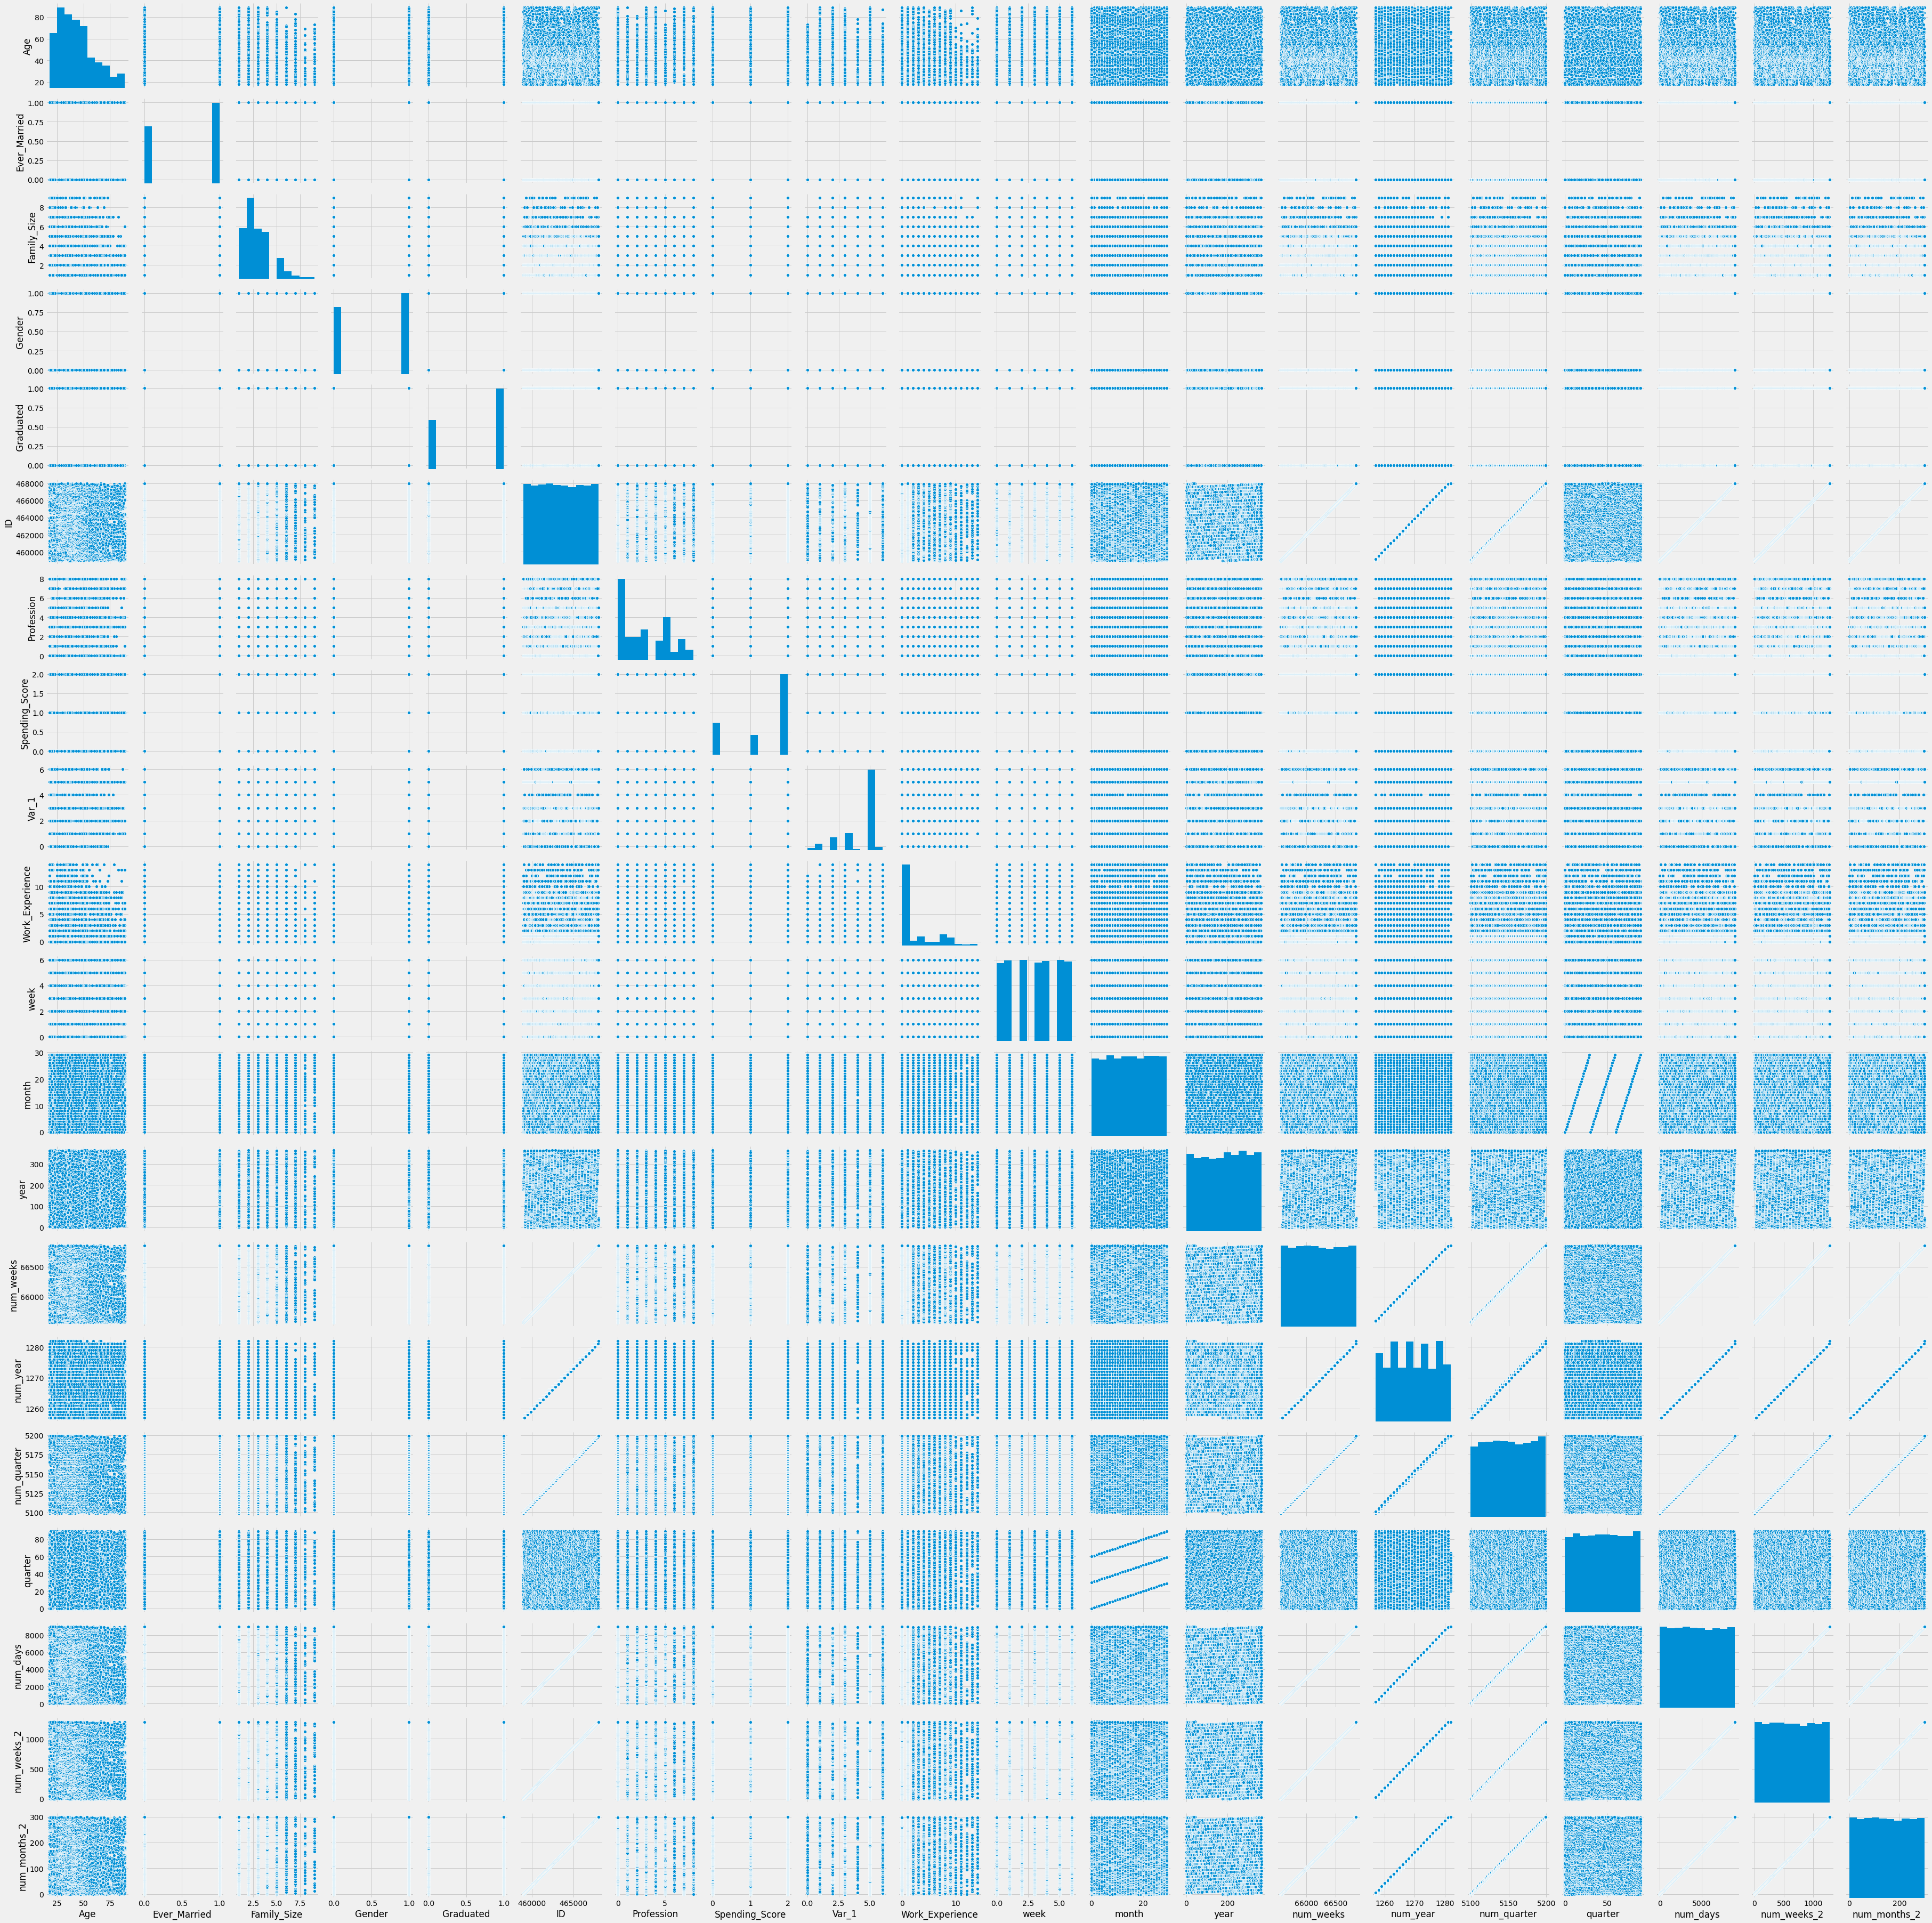

In [99]:
sns.pairplot(df)

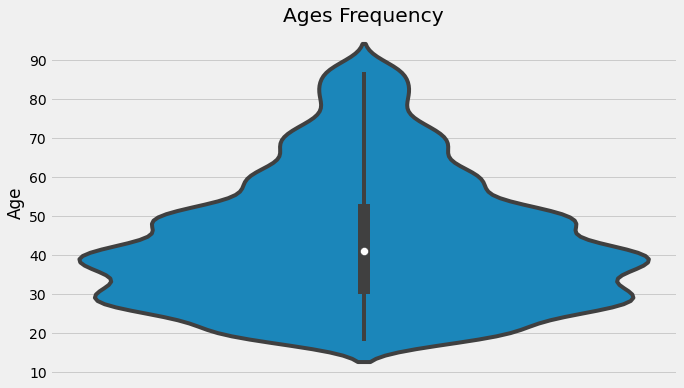

In [208]:
# Visualizing the Age Frequency
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df['Age'])
plt.show()

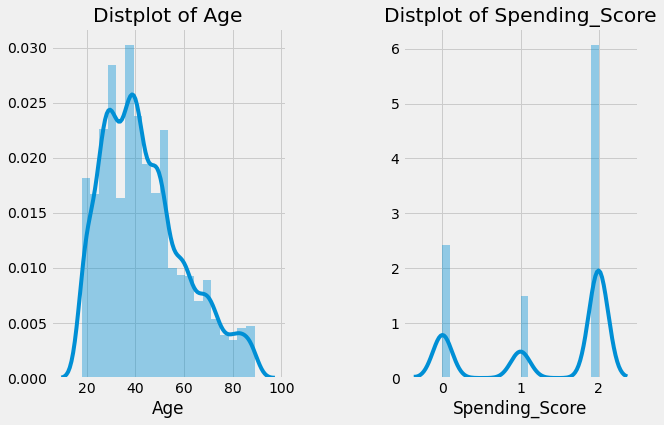

In [207]:
# A displot showing the Age ad Spending Score
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Spending_Score']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

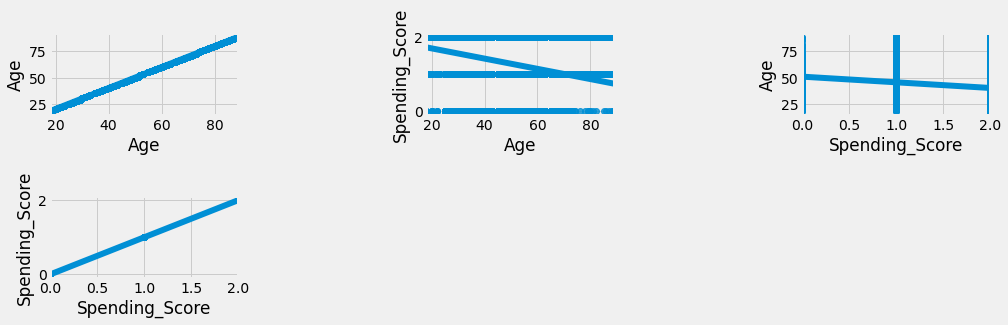

In [210]:
# Plotting the Relation between Age and Spending Score
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Spending_Score']:
    for y in ['Age' , 'Spending_Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 1.0 , wspace = 1.0)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

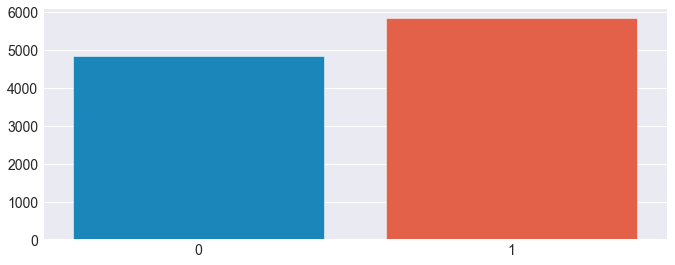

In [211]:
# Showing the Gender where 0 is female and 1 is male
Genders = df['Gender'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Genders.index, y=Genders.values)
plt.show()

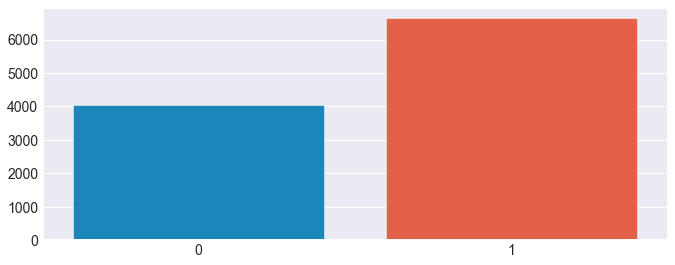

In [212]:
# Showing whether the customer graduated or not
Graduated = df['Graduated'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Graduated.index, y=Graduated.values)
plt.show()

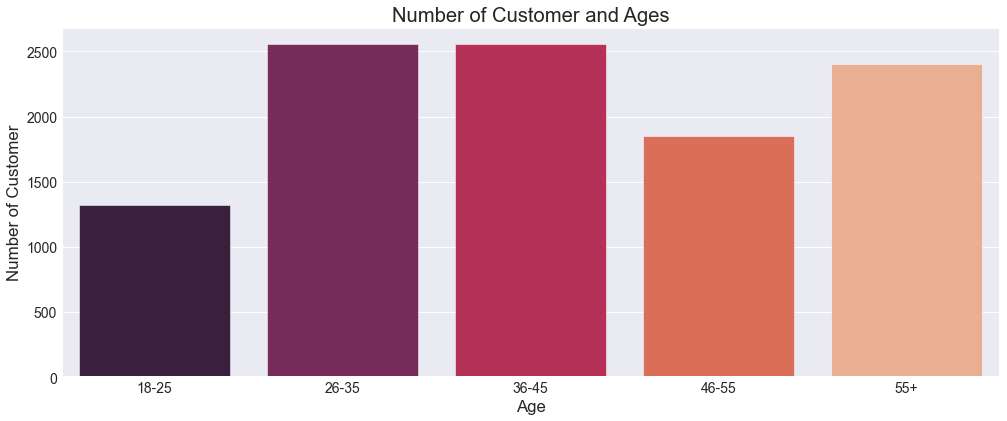

In [213]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

Segmentation     Var_1
2             2  4.393909
1             1  4.135786
0             0  4.082657
3             3  3.952381

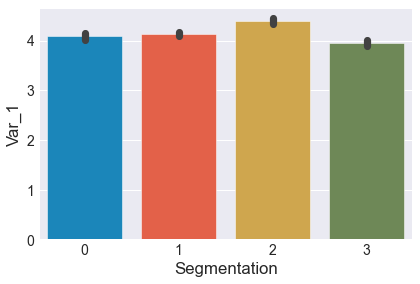

In [215]:
# Showing the Category of Customers and their Segmentation
sns.barplot(x='Segmentation',y='Var_1',data=df)
df[['Segmentation', 'Var_1']].groupby(['Segmentation'], as_index=False).mean().sort_values(by='Var_1', ascending=False)

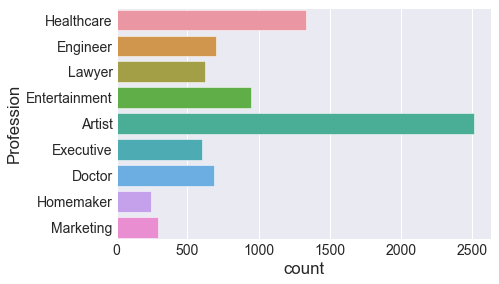

In [216]:
sns.countplot(y = 'Profession', data = train_data)

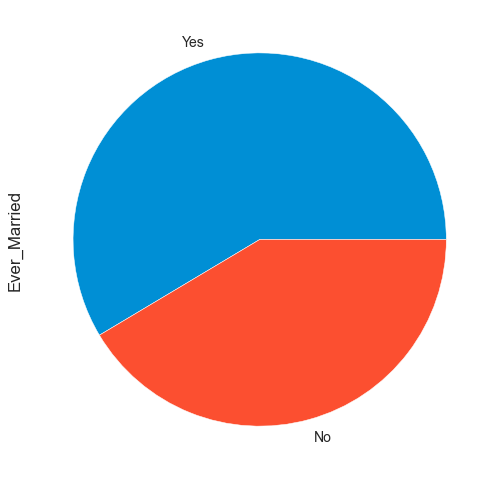

In [217]:
# Showing the Marriage Status where 1 is Yes and 0 is No
plt.subplots(figsize=(8,8))
train_data['Ever_Married'].value_counts().plot(kind='pie')

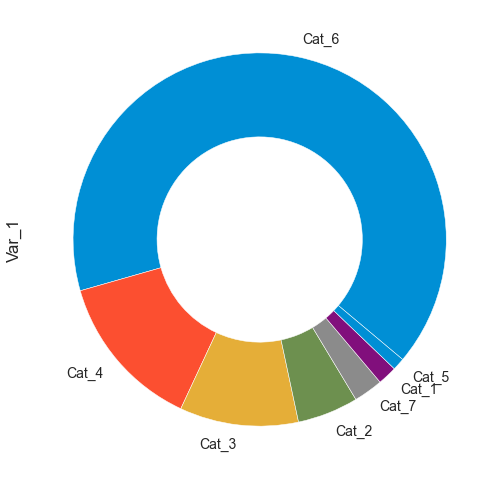

In [218]:
plt.subplots(figsize=(8,8))
train_data['Var_1'].value_counts().plot(kind='pie',wedgeprops=dict(width=0.45), startangle=-40)

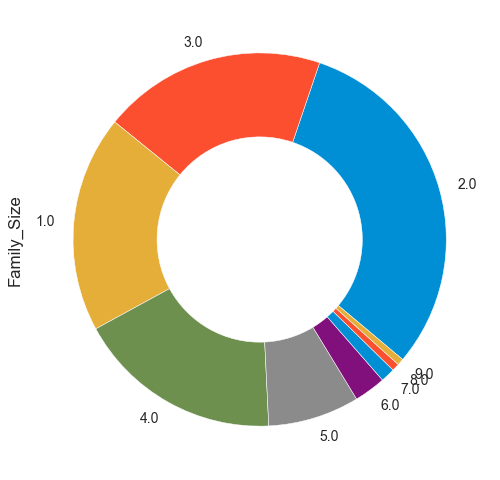

In [219]:
# Showing the Family_Size
plt.subplots(figsize=(8,8))
train_data['Family_Size'].value_counts().plot(kind='pie',wedgeprops=dict(width=0.45), startangle=-40)

## Step 4: Modelling and Evaluation

In [146]:
df.drop(('ID'), axis=1)

Age  Ever_Married  Family_Size  Gender  Graduated  Profession  \
0      22             0          4.0       1          0           5   
1      38             1          3.0       0          1           2   
2      67             1          1.0       0          1           2   
3      67             1          2.0       1          1           7   
4      40             1          6.0       0          1           3   
...   ...           ...          ...     ...        ...         ...   
2622   29             0          4.0       1          0           5   
2623   35             0          1.0       0          1           1   
2624   53             0          2.0       0          1           3   
2625   47             1          5.0       1          1           4   
2626   43             0          3.0       0          1           5   

     Segmentation  Spending_Score  Var_1  Work_Experience  week  month  year  \
0               D               2      3              1.0     4     29   354   
1               A               0      3              1.0     6     13   188   
2               B               2      5              1.0     3     25   210   
3               B               1      5              0.0     1      5    10   
4               A               1      5              0.0     4      9   214   
...           ...             ...    ...              ...   ...    ...   ...   
2622            B               2      5              9.0     4     14    24   
2623            B               2      5              1.0     1     18    28   
2624            B               2      5              1.0     3     20    30   
2625            B               1      3              1.0     4     21    31   
2626            B               2      6              9.0     4     28    38   

      num_weeks  num_year  num_quarter  quarter  num_days  num_weeks_2  \
0         66115      1267         5142       29      3827          546   
1         66091      1267         5140       43      3661          523   
2         66616      1277         5181       25      7333         1047   
3         65962      1265         5130       35      2753          393   
4         66095      1267         5140       69      3687          526   
...         ...       ...          ...      ...       ...          ...   
2622      66850      1282         5199       44      8972         1281   
2623      66851      1282         5199       48      8976         1282   
2624      66851      1282         5199       50      8978         1282   
2625      66851      1282         5199       51      8979         1282   
2626      66852      1282         5199       58      8986         1283   

      num_months_2  
0              127  
1              122  
2              244  
3               91  
4              122  
...            ...  
2622           299  
2623           299  
2624           299  
2625           299  
2626           299  

[10695 rows x 20 columns]

In [147]:
df['Segmentation'].unique()

array(['D', 'A', 'B', 'C'], dtype=object)

In [148]:
df['Segmentation']=df['Segmentation'].map({'A':0,'B':1,'C':2,'D':3})

In [152]:
X = df[['Age', 'Ever_Married', 'Family_Size', 'Gender', 'Graduated', 'ID',
       'Profession','Spending_Score', 'Var_1',
       'Work_Experience', 'week', 'month', 'year', 'num_weeks', 'num_year',
       'num_quarter', 'quarter', 'num_days', 'num_weeks_2', 'num_months_2']]

In [153]:
y = df['Segmentation']

In [154]:
# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

LR: 0.357610 (0.238363)


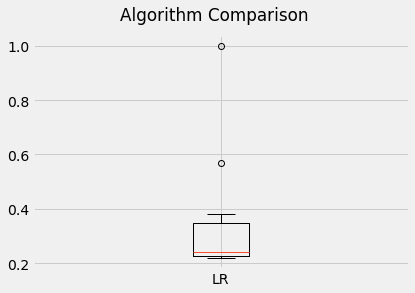

LDA: 0.392518 (0.078252)


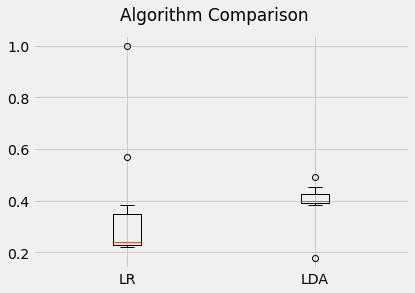

KNN: 0.311535 (0.047360)


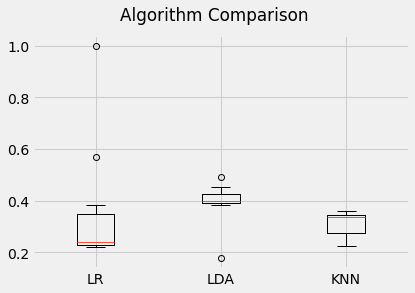

CART: 0.337154 (0.048191)


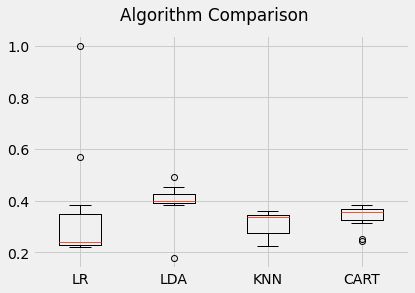

NB: 0.342540 (0.171548)


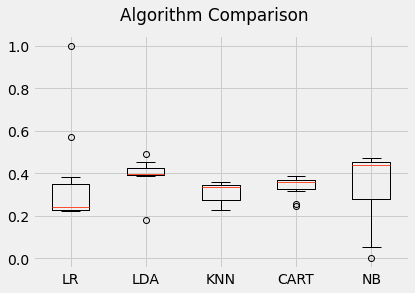

SVM: 0.419444 (0.306923)


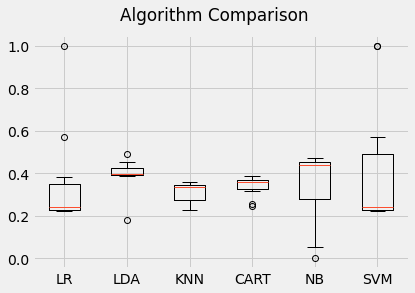

In [197]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()


In [199]:
num_trees = 30
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.3249793238505722


In [200]:
kfold = KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, y, cv=kfold)

In [201]:
print(results)

[0.41495327 0.39252336 0.41028037 0.41401869 0.42990654 0.43685688
 0.40318054 0.30215154 0.23479888 0.18521983]
